#  Webscrapping for Geospatial Analysis 

## Importing all the important libraries. 

In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import re
import matplotlib.pyplot as plt
import getpass
import folium 
import math 
import requests
import polyline


from yelpapi import YelpAPI

# This one allows me not to put plt.show() in every graph.
%matplotlib inline

In [2]:
user=  getpass.getuser()
user

'aimanmalik'

## Assigning the path, after making directory and sub directories. 

In [50]:
out_path = '/Users/' + user + '/Downloads/Econ 489/Problem_Set_3/Output/'
out_path

'/Users/aimanmalik/Downloads/Econ 489/Problem_Set_3/Output/'

 ## Inputing the coordinates for Texas Av and University Dr intersection and creating a dataframe.

In [4]:
TxAv_Unidr= { 'Latitude': [30.627789], 'Longitude': [-96.334853]}

In [5]:
df1 = pd.DataFrame.from_dict(TxAv_Unidr)
df1

,Latitude,Longitude
0,30.627789,-96.334853


### Defining a function to generate random coordinates within the boundaries of Bryan and College Station

In [6]:
def Random_Points_in_Bounds(polygon, number):   
    minx, miny, maxx, maxy = polygon.bounds
    x = np.random.uniform( minx, maxx, number )
    y = np.random.uniform( miny, maxy, number )
    return x, y

In [7]:
my_coor= [30.627818, -96.334884],[30.679756, -96.369213],[30.559332, -96.257843],[30.665392, -96.310853]

### Using the function to generate random points within the coordinates of the boundary of interest.

In [8]:
polygon = Polygon(my_coor)
gdf_poly = gpd.GeoDataFrame(index=["myPoly"], geometry=[polygon])

In [9]:
x,y = Random_Points_in_Bounds(polygon, 5)
df = pd.DataFrame()
df['points'] = list(zip(x,y))
df['points'] = df['points'].apply(Point)
gdf_points = gpd.GeoDataFrame(df, geometry='points')

In [10]:
gdf_points     #Dataset which contains randomly generated points within the area of interest. 

,points
0,POINT (30.663 -96.310)
1,POINT (30.622 -96.303)
2,POINT (30.639 -96.326)
3,POINT (30.571 -96.299)
4,POINT (30.614 -96.278)


In [11]:
print(type(gdf_points))        #Shows that it is a geodataframe

<class 'geopandas.geodataframe.GeoDataFrame'>


In [12]:
df2 = pd.DataFrame(gdf_points)
df2                            #Coverting from geodataframe to dataframe

,points
0,POINT (30.663 -96.310)
1,POINT (30.622 -96.303)
2,POINT (30.639 -96.326)
3,POINT (30.571 -96.299)
4,POINT (30.614 -96.278)


In [13]:
df2["points_str"]=df2["points"].values.astype('str')
df2

,points,points_str
0,POINT (30.663 -96.310),POINT (30.66255689433649 -96.31004373426578)
1,POINT (30.622 -96.303),POINT (30.62195100837472 -96.30253798788202)
2,POINT (30.639 -96.326),POINT (30.63927894859992 -96.32624932476763)
3,POINT (30.571 -96.299),POINT (30.57099563617867 -96.29927612196076)
4,POINT (30.614 -96.278),POINT (30.61438174372527 -96.27796282401509)


In [14]:
df2['points_str_nums'] =  [re.findall(r'-?\d*\.?\d+', str(x)) for x in df2['points_str']]
df2

,points,points_str,points_str_nums
0,POINT (30.663 -96.310),POINT (30.66255689433649 -96.31004373426578),"[30.66255689433649, -96.31004373426578]"
1,POINT (30.622 -96.303),POINT (30.62195100837472 -96.30253798788202),"[30.62195100837472, -96.30253798788202]"
2,POINT (30.639 -96.326),POINT (30.63927894859992 -96.32624932476763),"[30.63927894859992, -96.32624932476763]"
3,POINT (30.571 -96.299),POINT (30.57099563617867 -96.29927612196076),"[30.57099563617867, -96.29927612196076]"
4,POINT (30.614 -96.278),POINT (30.61438174372527 -96.27796282401509),"[30.61438174372527, -96.27796282401509]"


In [15]:
df2[['Latitude','Longitude']] = pd.DataFrame(df2.points_str_nums.tolist())

In [16]:
df2=df2.drop(columns =['points', 'points_str','points_str_nums'])
df2

,Latitude,Longitude
0,30.66255689433649,-96.31004373426578
1,30.62195100837472,-96.30253798788202
2,30.63927894859992,-96.32624932476763
3,30.57099563617867,-96.29927612196076
4,30.61438174372527,-96.27796282401509


In [17]:
df2= df2.astype({'Latitude':'float','Longitude':'float'}) #Changing from str to float to perform round function. 

In [18]:
df2.round({"Latitude":6, "Longitude":6})   #Rounding to 6 decimal places to achieve uniformity in data set. 

,Latitude,Longitude
0,30.662557,-96.310044
1,30.621951,-96.302538
2,30.639279,-96.326249
3,30.570996,-96.299276
4,30.614382,-96.277963


In [19]:
df3 = pd.DataFrame(my_coor, columns = ['Latitude','Longitude'])
df3                                                            #Converting the given data points to into a dataframe

,Latitude,Longitude
0,30.627818,-96.334884
1,30.679756,-96.369213
2,30.559332,-96.257843
3,30.665392,-96.310853


In [20]:
frames = [df1, df3, df2]

In [21]:
df4 = pd.concat(frames, ignore_index=True)

# The dataframe containing ten coordinates. 

In [22]:
df4

,Latitude,Longitude
0,30.627789,-96.334853
1,30.627818,-96.334884
2,30.679756,-96.369213
3,30.559332,-96.257843
4,30.665392,-96.310853
5,30.664055,-96.282430
6,30.647621,-96.313469
7,30.591929,-96.324004
8,30.600969,-96.350424
9,30.621017,-96.300349


## Performing loop search.

### Performing the search on convenience stores while looping over the dataframe of ten coordinates

In [22]:
my_api_key = "Pi8DOKt-9QMp_YtCmhUwHMbGn-DAnImSHLw6S8YKAciPhiZSEH3ChJL8UiSAm88XfpDQXdwi5Zlir1nCXD8h2MhDDUCoA9rVWYsbutFWFx45ESZ2GkUq3fiAZwNYY3Yx"
yelp_api = YelpAPI(my_api_key)

In [23]:
all_convenience_stores_data = pd.DataFrame()
for index, row in df4.iterrows():
    convenience_stores_data = yelp_api.search_query(categories='covenience stores', longitude=row['Longitude'], latitude=row['Latitude'], limit=50)
    subset= pd.DataFrame()
    for each_business in convenience_stores_data['businesses']:
         subset = subset.append(each_business, ignore_index=True)
    all_convenience_stores_data = all_convenience_stores_data.append(subset)

### The data set after the yelp search.

In [24]:
all_convenience_stores_data

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,rvEiaZ_idJskWTi-CpLUrA,fuego-tortilla-grill-college-station,Fuego Tortilla Grill,https://s3-media2.fl.yelpcdn.com/bphoto/PluTqo...,0.0,https://www.yelp.com/biz/fuego-tortilla-grill-...,767.0,"[{'alias': 'tex-mex', 'title': 'Tex-Mex'}, {'a...",4.0,"{'latitude': 30.62793, 'longitude': -96.33345}",[delivery],$,"{'address1': '108 Poplar St', 'address2': '', ...",+19797031804,(979) 703-1804,134.987620
1,rOfX5ve4f1PbShG-H6d5Fw,mess-college-station,MESS,https://s3-media2.fl.yelpcdn.com/bphoto/lr0n6l...,0.0,https://www.yelp.com/biz/mess-college-station?...,218.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.5,"{'latitude': 30.62631622008178, 'longitude': -...",[delivery],$,"{'address1': '170 Century Square Dr', 'address...",+19797045200,(979) 704-5200,344.843382
2,J2zLOF6Af8eNjq8cs0ZRvA,first-watch-college-station-2,First Watch,https://s3-media3.fl.yelpcdn.com/bphoto/tIo6RK...,0.0,https://www.yelp.com/biz/first-watch-college-s...,493.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 30.63065477, 'longitude': -96.337...",[],$$,"{'address1': '4501 S Texas Ave', 'address2': N...",+19797046652,(979) 704-6652,423.283747
3,ceJJ7WCFy_5OloU3YqWKwQ,the-republic-college-station,The Republic,https://s3-media2.fl.yelpcdn.com/bphoto/hB14Cd...,0.0,https://www.yelp.com/biz/the-republic-college-...,303.0,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 30.633866136851196, 'longitude': ...",[delivery],$$$,"{'address1': '701 University Dr E', 'address2'...",+19792604120,(979) 260-4120,879.268415
4,JxMygk03qWoCOUTOPZ2FFg,grub-burger-bar-college-station,Grub Burger Bar,https://s3-media4.fl.yelpcdn.com/bphoto/Gjilqk...,0.0,https://www.yelp.com/biz/grub-burger-bar-colle...,482.0,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.0,"{'latitude': 30.63500809336456, 'longitude': -...","[pickup, delivery]",$$,"{'address1': '980 University Dr E', 'address2'...",+19792681041,(979) 268-1041,1394.178593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,_54w_bevFJ53giLE_k3mnA,azure-fusion-bistro-and-sake-college-station,Azure Fusion Bistro & Sake,https://s3-media2.fl.yelpcdn.com/bphoto/OZIZN4...,0.0,https://www.yelp.com/biz/azure-fusion-bistro-a...,113.0,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,"{'latitude': 30.58604, 'longitude': -96.28402}",[delivery],$$,"{'address1': '3975 State Hwy 6 S', 'address2':...",+19796937836,(979) 693-7836,3185.413682
46,MCQ9N2pUHAyULJD9gIaQBw,oishi-sushi-asian-fusion-college-station-3,Oishi Sushi Asian Fusion,https://s3-media3.fl.yelpcdn.com/bphoto/E4GWeV...,0.0,https://www.yelp.com/biz/oishi-sushi-asian-fus...,183.0,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 30.58284, 'longitude': -96.32158}",[delivery],$$,"{'address1': '11667 Fm 2154', 'address2': 'Ste...",+19796800888,(979) 680-0888,5309.627950
47,W7tJIy-nE3FIfIA8v7qpwg,kais-doughnut-bryan,Kai's Doughnut,https://s3-media1.fl.yelpcdn.com/bphoto/2a3K9O...,0.0,https://www.yelp.com/biz/kais-doughnut-bryan?a...,96.0,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",4.5,"{'latitude': 30.62179, 'longitude': -96.35331}","[delivery, pickup]",$,"{'address1': '4201 Wellborn Rd', 'address2': '...",+12817974988,(281) 797-4988,7321.826162
48,5cyTWzX6kcJGzKR0H_owmA,laynes-of-college-station-college-station,Layne's of College Station,https://s3-media3.fl.yelpcdn.com/bphoto/mSxYph...,0.0,https://www.yelp.com/biz/laynes-of-college-sta...,207.0,"[{'alias': 'hotdogs', 'title': 'Fast Food'}]",4.0,"{'latitude': 30.623196, 'longitude': -96.328521}",[delivery],$,"{'address1': '106 Walton Dr', 'address2': '', ...",+19796967633,(979) 696-7633,4944.595151


## Cleaning the Data set by sorting and dropping duplicates. 

In [25]:
all_convenience_stores_data = all_convenience_stores_data.sort_values(by='id')

In [26]:
all_convenience_stores_data = all_convenience_stores_data.drop_duplicates(subset='id', keep='first').reset_index(drop=True)
all_convenience_stores_data 

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,-1XN0-koGQxKZ5KritI3WQ,nam-noodles-and-more-college-station,Nam Noodles & More,https://s3-media2.fl.yelpcdn.com/bphoto/LqoKYX...,0.0,https://www.yelp.com/biz/nam-noodles-and-more-...,79.0,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",4.5,"{'latitude': 30.555328354873854, 'longitude': ...","[delivery, pickup]",NaN,"{'address1': '910 William D Fitch', 'address2'...",+19797045496,(979) 704-5496,573.366297
1,-Z1DtXVGsHPn9H-8okFfVQ,chois-restaurant-college-station-3,Choi's Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/4v1Kun...,0.0,https://www.yelp.com/biz/chois-restaurant-coll...,98.0,"[{'alias': 'korean', 'title': 'Korean'}]",4.0,"{'latitude': 30.619933, 'longitude': -96.320774}","[delivery, pickup]",$$,"{'address1': '311 Dominik Dr', 'address2': '',...",+19797037911,(979) 703-7911,1608.370799
2,06fULC6vw_n_gxdLMkCGCA,imperial-chinese-and-sushi-bryan-2,Imperial Chinese & Sushi,https://s3-media3.fl.yelpcdn.com/bphoto/R8tgdP...,0.0,https://www.yelp.com/biz/imperial-chinese-and-...,134.0,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 30.6754494, 'longitude': -96.3390...","[pickup, delivery]",$$,"{'address1': '980 N Earl Rudder Fwy', 'address...",+19797747888,(979) 774-7888,3120.628734
3,06wkrksSXYiozgEr-H1GPg,snooze-an-a-m-eatery-college-station-4,"Snooze, an A.M. Eatery",https://s3-media3.fl.yelpcdn.com/bphoto/HVsBJE...,0.0,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,83.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 30.634775605802876, 'longitude': ...",[],$$,"{'address1': '711 University Dr E', 'address2'...",+19799211750,(979) 921-1750,1032.800664
4,0YehAX70ilPcnYbvRCyw9g,napa-flats-wood-fired-kitchen-college-station-...,Napa Flats Wood Fired Kitchen - College Station,https://s3-media4.fl.yelpcdn.com/bphoto/CbbBO5...,0.0,https://www.yelp.com/biz/napa-flats-wood-fired...,724.0,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 30.61604025619329, 'longitude': -...","[delivery, pickup]",$$,"{'address1': '1727 Texas Ave S', 'address2': '...",+19793832500,(979) 383-2500,3919.960840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ybulcs6QSqG82J6MFovNPg,the-downtown-elixir-and-spirits-bryan-2,The Downtown Elixir and Spirits,https://s3-media2.fl.yelpcdn.com/bphoto/cV0yg0...,0.0,https://www.yelp.com/biz/the-downtown-elixir-a...,51.0,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 30.67296, 'longitude': -96.37383}",[delivery],$$,"{'address1': '120 S Main St', 'address2': '', ...",+19798222120,(979) 822-2120,876.119145
128,yif7JJdoixqgqJOsKn_WpQ,blaze-pizza-college-station,Blaze Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/Tjl1OL...,0.0,https://www.yelp.com/biz/blaze-pizza-college-s...,145.0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",4.0,"{'latitude': 30.62573006, 'longitude': -96.338...","[pickup, delivery]",$,"{'address1': '143 Century Square Dr', 'address...",+19792272629,(979) 227-2629,429.086315
129,ympDU3oTeVF4QKSR-zxpEw,taqueria-el-tio-bryan,Taqueria El Tio,https://s3-media2.fl.yelpcdn.com/bphoto/ph5NnA...,0.0,https://www.yelp.com/biz/taqueria-el-tio-bryan...,49.0,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 30.681931, 'longitude': -96.372626}",[],$,"{'address1': '911 N Bryan Ave', 'address2': ''...",,,406.224398
130,zcPlAXcx_cCZAfEo7tR6ig,saltgrass-steak-house-college-station-3,Saltgrass Steak House,https://s3-media2.fl.yelpcdn.com/bphoto/sTzZtK...,0.0,https://www.yelp.com/biz/saltgrass-steak-house...,151.0,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",3.0,"{'latitude': 30.564662148860542, 'longitude': ...","[delivery, pickup]",$$,"{'address1': '4330 State Highway 6 S', 'addres...",+19796900562,(979) 690-0562,970.246574


In [27]:
all_convenience_stores_data.name.value_counts()

Blue Baker                             3
Nam Noodles & More                     1
C & J Barbeque - The Original Store    1
Polly's Cocina                         1
The Republic                           1
                                      ..
Dutch Bros Coffee                      1
Taz Indian Cuisine                     1
Tacos La Perlita                       1
Sweet Paris Crêperie & Café            1
Chef Cao's                             1
Name: name, Length: 130, dtype: int64

In [28]:
all_convenience_stores_data.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [29]:
all_convenience_stores_data.coordinates

0      {'latitude': 30.555328354873854, 'longitude': ...
1       {'latitude': 30.619933, 'longitude': -96.320774}
2      {'latitude': 30.6754494, 'longitude': -96.3390...
3      {'latitude': 30.634775605802876, 'longitude': ...
4      {'latitude': 30.61604025619329, 'longitude': -...
                             ...                        
127       {'latitude': 30.67296, 'longitude': -96.37383}
128    {'latitude': 30.62573006, 'longitude': -96.338...
129     {'latitude': 30.681931, 'longitude': -96.372626}
130    {'latitude': 30.564662148860542, 'longitude': ...
131    {'latitude': 30.5583711225503, 'longitude': -9...
Name: coordinates, Length: 132, dtype: object

In [30]:
all_convenience_stores_data.dtypes

id                object
alias             object
name              object
image_url         object
is_closed        float64
url               object
review_count     float64
categories        object
rating           float64
coordinates       object
transactions      object
price             object
location          object
phone             object
display_phone     object
distance         float64
dtype: object

## Converting coordinates to string and using apply function. 

In [31]:
all_convenience_stores_data['coordinates'] = all_convenience_stores_data['coordinates'].astype('str')
all_convenience_stores_data['coordinates'] = all_convenience_stores_data['coordinates'].apply(eval)
all_convenience_stores_data['latitude'] = [all_convenience_stores_data.loc[i,'coordinates']['latitude'] for i in range(all_convenience_stores_data.shape[0])]
all_convenience_stores_data['longitude'] = [all_convenience_stores_data.loc[i,'coordinates']['longitude'] for i in range(all_convenience_stores_data.shape[0])]

In [32]:
all_convenience_stores_data

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude
0,-1XN0-koGQxKZ5KritI3WQ,nam-noodles-and-more-college-station,Nam Noodles & More,https://s3-media2.fl.yelpcdn.com/bphoto/LqoKYX...,0.0,https://www.yelp.com/biz/nam-noodles-and-more-...,79.0,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}]",4.5,"{'latitude': 30.555328354873854, 'longitude': ...","[delivery, pickup]",NaN,"{'address1': '910 William D Fitch', 'address2'...",+19797045496,(979) 704-5496,573.366297,30.555328,-96.261617
1,-Z1DtXVGsHPn9H-8okFfVQ,chois-restaurant-college-station-3,Choi's Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/4v1Kun...,0.0,https://www.yelp.com/biz/chois-restaurant-coll...,98.0,"[{'alias': 'korean', 'title': 'Korean'}]",4.0,"{'latitude': 30.619933, 'longitude': -96.320774}","[delivery, pickup]",$$,"{'address1': '311 Dominik Dr', 'address2': '',...",+19797037911,(979) 703-7911,1608.370799,30.619933,-96.320774
2,06fULC6vw_n_gxdLMkCGCA,imperial-chinese-and-sushi-bryan-2,Imperial Chinese & Sushi,https://s3-media3.fl.yelpcdn.com/bphoto/R8tgdP...,0.0,https://www.yelp.com/biz/imperial-chinese-and-...,134.0,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 30.6754494, 'longitude': -96.3390...","[pickup, delivery]",$$,"{'address1': '980 N Earl Rudder Fwy', 'address...",+19797747888,(979) 774-7888,3120.628734,30.675449,-96.339020
3,06wkrksSXYiozgEr-H1GPg,snooze-an-a-m-eatery-college-station-4,"Snooze, an A.M. Eatery",https://s3-media3.fl.yelpcdn.com/bphoto/HVsBJE...,0.0,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,83.0,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 30.634775605802876, 'longitude': ...",[],$$,"{'address1': '711 University Dr E', 'address2'...",+19799211750,(979) 921-1750,1032.800664,30.634776,-96.327733
4,0YehAX70ilPcnYbvRCyw9g,napa-flats-wood-fired-kitchen-college-station-...,Napa Flats Wood Fired Kitchen - College Station,https://s3-media4.fl.yelpcdn.com/bphoto/CbbBO5...,0.0,https://www.yelp.com/biz/napa-flats-wood-fired...,724.0,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 30.61604025619329, 'longitude': -...","[delivery, pickup]",$$,"{'address1': '1727 Texas Ave S', 'address2': '...",+19793832500,(979) 383-2500,3919.960840,30.616040,-96.318881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,ybulcs6QSqG82J6MFovNPg,the-downtown-elixir-and-spirits-bryan-2,The Downtown Elixir and Spirits,https://s3-media2.fl.yelpcdn.com/bphoto/cV0yg0...,0.0,https://www.yelp.com/biz/the-downtown-elixir-a...,51.0,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 30.67296, 'longitude': -96.37383}",[delivery],$$,"{'address1': '120 S Main St', 'address2': '', ...",+19798222120,(979) 822-2120,876.119145,30.672960,-96.373830
128,yif7JJdoixqgqJOsKn_WpQ,blaze-pizza-college-station,Blaze Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/Tjl1OL...,0.0,https://www.yelp.com/biz/blaze-pizza-college-s...,145.0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",4.0,"{'latitude': 30.62573006, 'longitude': -96.338...","[pickup, delivery]",$,"{'address1': '143 Century Square Dr', 'address...",+19792272629,(979) 227-2629,429.086315,30.625730,-96.338646
129,ympDU3oTeVF4QKSR-zxpEw,taqueria-el-tio-bryan,Taqueria El Tio,https://s3-media2.fl.yelpcdn.com/bphoto/ph5NnA...,0.0,https://www.yelp.com/biz/taqueria-el-tio-bryan...,49.0,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 30.681931, 'longitude': -96.372626}",[],$,"{'address1': '911 N Bryan Ave', 'address2': ''...",,,406.224398,30.681931,-96.372626
130,zcPlAXcx_cCZAfEo7tR6ig,saltgrass-steak-house-college-station-3,Saltgrass Steak House,https://s3-media2.fl.yelpcdn.com/bphoto/sTzZtK...,0.0,https://www.yelp.com/biz/saltgrass-steak-house...,151.0,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",3.0,"{'latitude': 30.564662148860542, 'longitude': ...","[delivery, pickup]",$$,"{'address1'

In [45]:
type(all_convenience_stores_data)

pandas.core.frame.DataFrame

## Visualization: Making the scatter plot of locations. 

Text(0.5, 1.0, 'Scatter Plot for Locations')

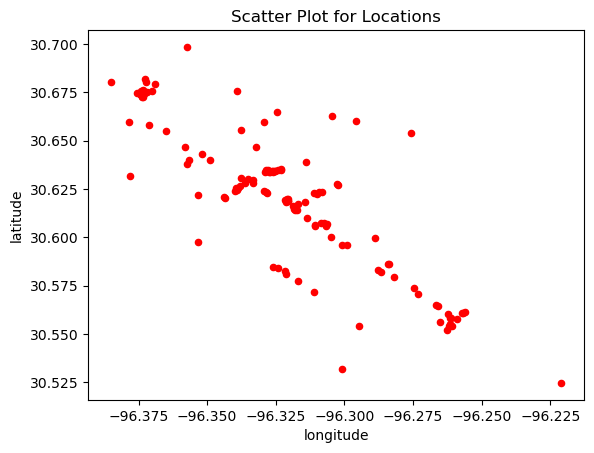

In [33]:
#plt.title('%matplotlib inline function's magic')#
figure = all_convenience_stores_data.plot.scatter(x='longitude', y='latitude', color='red')
plt.title("Scatter Plot for Locations")

# Part 11: Saving the Figure to directory 

In [52]:
figure.get_figure().savefig(out_path + 'Convenience_Stores_BCS_Manzoor_Aiman.png')

## Saving the dataset in csv format.

In [51]:
all_convenience_stores_data.to_csv(out_path + 'ConvenienceStores_BCS.csv')

## Harvesine Fuction 

In [41]:
 def distance_harvesine(df):

    # I'll use a dictionary because it doesn't need to have a pre-defined size.
    
    dict_distance = {}
    
    df_copy = df.copy()      #Making a copy for the dataframe
    
    for i, row in df_copy.iterrows():
        list_distance = []
        
        lon1 = df_copy['longitude'][i]
        lat1 = df_copy['latitude'][i]
        
        origin = (lat1,lon1)

        for j, row in df_copy.iterrows():
            lon2 = df_copy['longitude'][j]
            lat2 = df_copy['latitude'][j]
            
            destination = (lat2,lon2)
            
            try:
                dist = distance(origin, destination)
            except:
                dist = 100000000000
                                
            list_distance.append(dist)
            
            
        dict_distance[i] = list_distance
            
            

    distance_matrix = pd.DataFrame.from_dict(dict_distance)

    return distance_matrix
         

In [42]:
df_H = distance_harvesine(all_convenience_stores_data)

In [43]:
df_H

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
1,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
2,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
3,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
4,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
128,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
129,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
130,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,...,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000,100000000000
